In [2]:
# Dependencies and Setup
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np
import requests
import time
import scipy.stats as st

# Data files
most_sleep_metadata_path = "Resources/MostSleep.csv"
lif_quality_path = "Resources/life_quality_and_health_by_country.csv"

# Read the mouse data and the study results
most_sleep_metadata = pd.read_csv(most_sleep_metadata_path)
study_results = pd.read_csv(lif_quality_path)

# Combine the data into a single DataFrame with the Country column as the key
#sleep_study_data = pd.merge(most_sleep_metadata, study_results, how="left", on=["Country", "Country"])
sleep_study_data = pd.merge(most_sleep_metadata, study_results, on=["Country"])

#Rename the "total" column to "total quality of life" 
sleep_study_data = sleep_study_data.rename(columns={"Total":"Total Quality of Life"})

sleep_study_data

,Country,Sleep hours,Population,Stability,Rights,Health,Safety,Climate,Cost,Popularity,Total Quality of Life
0,Mexico,9.00,"130,262,216",53,33,45,42,82,30,59,47
1,South Africa,7.04,"60,604,000",43,54,26,40,95,49,38,51
2,Finland,7.36,"5,548,360",85,100,87,96,17,46,51,69
3,Netherlands,7.36,"17,173,099",81,99,83,95,21,40,59,68
4,New Zealand,7.30,"4,860,643",90,100,81,97,36,29,54,69
5,Estonia,7.25,"1,325,185",72,90,78,90,17,40,35,61
6,Iceland,7.25,"343,353",84,94,87,100,7,37,51,65
7,Hungary,7.21,"9,634,164",68,56,79,97,43,58,47,63
8,Croatia,7.20,"4,081,651",66,59,78,96,50,68,39,66
9,Belgium,7.18,"11,632,326",72,88,90,94,20,32,56,63


In [26]:
# Define a function to create Linear Regression between hours of sleep and total quality of life
def linear_regression_hours_of_sleep_vs_quality_of_life(data):
    # Extract the hours of sleep and total quality of life columns from the data
    hours_of_sleep = data['Sleep hours']
    quality_of_life = data['Total Quality of Life']

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(hours_of_sleep, quality_of_life)

    # Create the regression equation (y = mx + b)
    regression_equation = f'y = {slope:.2f} * x + {intercept:.2f}'

    # Return the regression coefficients and equation
    return {
        'slope': slope,
        'intercept': intercept,
        'r_value': r_value,
        'p_value': p_value,
        'std_err': std_err,
        'regression_equation': regression_equation
    }

regression_results = linear_regression_hours_of_sleep_vs_quality_of_life(sleep_study_data)
slope = regression_results['slope']
intercept = regression_results['intercept']
regression_equation = regression_results['regression_equation']
print(regression_results)

{'slope': 0.23315816083855126, 'intercept': 61.189409656156585, 'r_value': 0.01658794594351007, 'p_value': 0.9070838713842202, 'std_err': 1.9875279690731384, 'regression_equation': 'y = 0.23 * x + 61.19'}


Correlation coefficient (r): 0.02


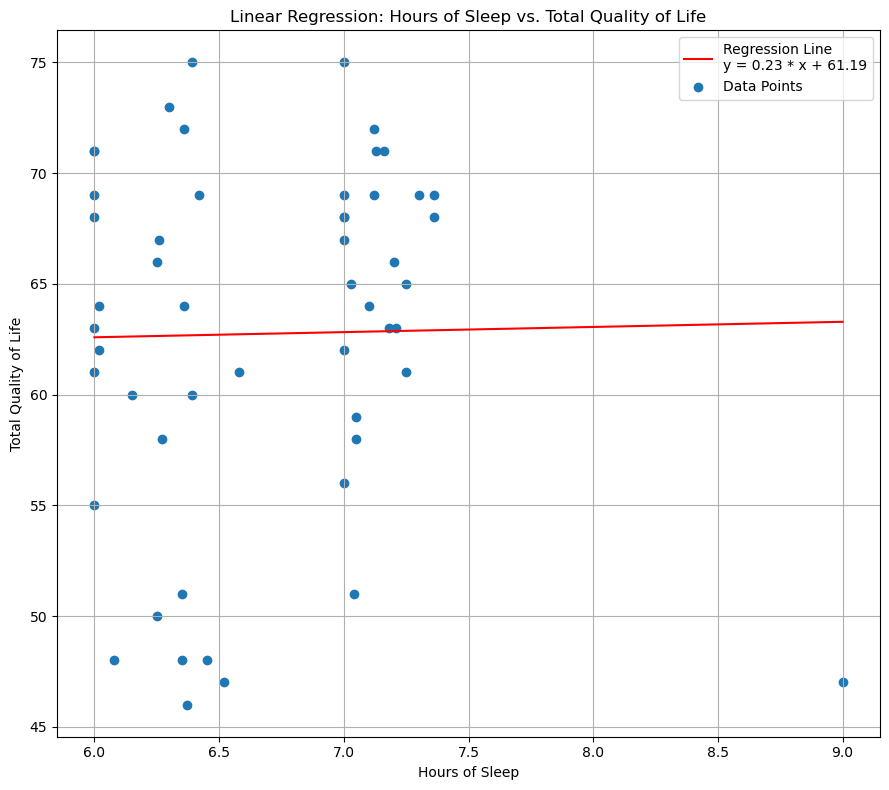

In [27]:
#Print a grphic representation of the linear regression between hours of sleep and total quality of life
# Create the scatter plot
plt.figure(figsize=(9, 8))
plt.scatter(sleep_study_data['Sleep hours'], sleep_study_data['Total Quality of Life'], label='Data Points')

# Create the regression line
x_vals = np.linspace(min(sleep_study_data['Sleep hours']), max(sleep_study_data['Sleep hours']), 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red', label=f'Regression Line\n{regression_equation}')

# Add labels and title
plt.xlabel('Hours of Sleep')
plt.ylabel('Total Quality of Life')
plt.title('Linear Regression: Hours of Sleep vs. Total Quality of Life')

# Add legend
plt.legend()

# Add the r-value as text annotation on the plot
r_value = regression_results['r_value']
print(f"Correlation coefficient (r): {r_value:.2f}")

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
# Define a function to create Linear Regression between hours of sleep and Health
def linear_regression_hours_of_sleep_vs_health(data):
    # Extract the hours of sleep and total quality of life columns from the data
    hours_of_sleep = data['Sleep hours']
    quality_of_life = data['Health']

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(hours_of_sleep, quality_of_life)

    # Create the regression equation (y = mx + b)
    regression_equation = f'y = {slope:.2f} * x + {intercept:.2f}'

    # Return the regression coefficients and equation
    return {
        'slope': slope,
        'intercept': intercept,
        'r_value': r_value,
        'p_value': p_value,
        'std_err': std_err,
        'regression_equation': regression_equation
    }

regression_results_health = linear_regression_hours_of_sleep_vs_health(sleep_study_data)
slope = regression_results_health['slope']
intercept = regression_results_health['intercept']
regression_equation = regression_results_health['regression_equation']
print(regression_results_health)

{'slope': 0.7025265602204098, 'intercept': 69.95164674452474, 'r_value': 0.023309453704457504, 'p_value': 0.8697130011253595, 'std_err': 4.261157982011903, 'regression_equation': 'y = 0.70 * x + 69.95'}


Correlation coefficient (r): 0.02


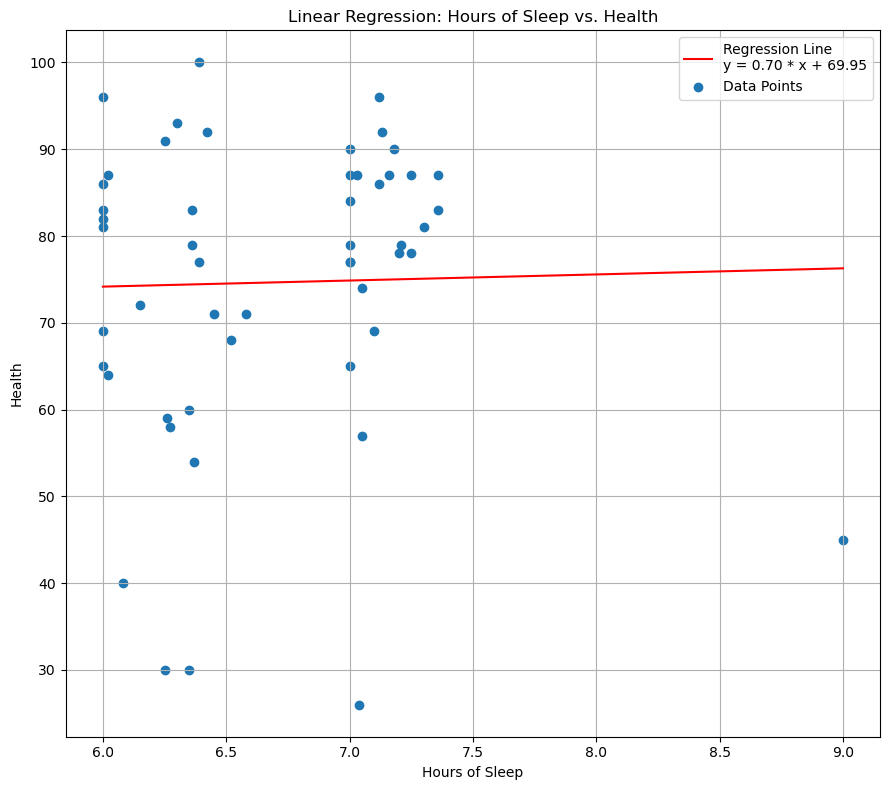

In [29]:
#Print a grphic representation of the linear regression between hours of sleep and total quality of life
# Create the scatter plot
plt.figure(figsize=(9, 8))
plt.scatter(sleep_study_data['Sleep hours'], sleep_study_data['Health'], label='Data Points')

# Create the regression line
x_vals = np.linspace(min(sleep_study_data['Sleep hours']), max(sleep_study_data['Sleep hours']), 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red', label=f'Regression Line\n{regression_equation}')

# Add labels and title
plt.xlabel('Hours of Sleep')
plt.ylabel('Health')
plt.title('Linear Regression: Hours of Sleep vs. Health')

# Add legend
plt.legend()

# Add the r-value as text annotation on the plot
r_value = regression_results_health['r_value']
print(f"Correlation coefficient (r): {r_value:.2f}")

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()